In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mb

### Step 1: Import necessary dataframes for geosmin concentrations at Marston Reservoir - df_geosmin

In [2]:
#conduit 20 geosmin entries
conduit20_geosmin = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/conduit20_geosmin.csv')

#reservoir sampling geosmin entries
sample_res_geosmin = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/sample_res_geosmin.csv')

#water treatment plant samples
wtp_samples_geosmin = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/wtp_samples_geosmin.csv')

#water treatment plant influent geosmin entries
wtp_influent_geosmin = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/wtp_influent_geosmin.csv')

In [3]:
frames = [conduit20_geosmin, sample_res_geosmin, wtp_influent_geosmin, wtp_samples_geosmin]
df_geosmin = pd.concat(frames)

In [4]:
#check final dataframe for geosmin values
df_geosmin

,SAMPLE_NUMBER,SAMPLED_DATE,SAMPLE_NAME,SAMPLING_POINT_DESCRIPTION,SITE,FACILITY,ANALYTE,FORMATTED_ENTRY,UNITS,DEPTH
0,233240,2/4/2013 10:27,WS-LP-021,NaN,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,2.14,ng/L,NaN
1,556579,4/22/2019 10:22,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,3.00,ng/L,NaN
2,558288,4/30/2019 11:35,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,4.00,ng/L,NaN
3,562497,5/7/2019 10:01,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,5.00,ng/L,NaN
4,564659,5/21/2019 8:26,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,4.00,ng/L,NaN
...,...,...,...,...,...,...,...,...,...,...
122,1088836,5/24/2022 9:32,PL-MAR-MLOWM,Marston WTP MLOW Mid,Marston WTP MLOW Mid,Marston WTP,Geosmin,2.00,ng/L,MLOWM
123,1114355,5/26/2022 15:22,PL-MAR-MLOWM-A-4,NaN,Marston WTP MLOW Mid,Marston WTP,Geosmin,3.00,ng/L,MLOWM
124,1088837,5/31/2022 9:01,PL-MAR-MLOWM,Marston WTP MLOW Mid,Marston WTP MLOW Mid,Marston WTP,Geosmin,3.00,ng/L,MLOWM
125,1119241,6/2/2022 9:07,PL-MAR-MLOWM-A-4,NaN,Marston WTP MLOW Mid,Marston WTP,Geosmin,3.00,ng/L,MLOWM


In [5]:
df_geosmin.to_csv('df_geosmin.csv', index=False)

### Step 2: Import necessary dataframes for nutrient information - df_full

In [6]:
ms_above_conf_nut = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/ms_above_conf_nut_filled.csv')
nf_above_conf_nut = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/nf_above_conf_nut_filled.csv')
downstream_strontia_nut = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/downstream_strontia_nut_filled.csv')
upstream_strontia_nut = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/upstream_strontia_nut_filled.csv')
sp_below_chat_nut = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/sp_below_chat_nut_filled.csv')

In [7]:
#reset indices to ease merging of dataframes
ms_above_conf_nut.reset_index(drop=True, inplace=True)
nf_above_conf_nut.reset_index(drop = True, inplace= True)
downstream_strontia_nut.reset_index(drop=True, inplace=True)
upstream_strontia_nut.reset_index(drop=True, inplace=True)
sp_below_chat_nut.reset_index(drop=True, inplace=True)

In [8]:
#concat is not working, use merge function as well
df_full = ms_above_conf_nut.merge(nf_above_conf_nut, on=['Date'], how='outer')

In [9]:
df_full = df_full.merge(downstream_strontia_nut, on=['Date'], how='outer')
df_full = df_full.merge(upstream_strontia_nut, on=['Date'], how='outer')
df_full = df_full.merge(sp_below_chat_nut, on=['Date'], how = 'outer')

### Import dataframes for water temperature at locations and flow/air temperatures - df_flows_temp

In [10]:
#waterton gage data - flow rate and water temperature calculations
waterton_data = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/waterton_data.csv')

#cheesman and roberts tunnel data + strontia temp data
ch_rt_data = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/cheesman_roberts_flow_temp_data.csv')

#conduit 20 and marston reservoir data (flow, air temperature)
cond20_mar_data = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/marston_cond20_flow_temp_data.csv')


#water temp data from different points

#nf above confluence
nf_above_conf_temp = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/nf_above_conf_temp_filled.csv')

#ms above confluence
ms_above_conf_temp = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/ms_above_conf_temp_filled.csv')

#upstream strontia
upstream_strontia_temp = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/upstream_strontia_temp_filled.csv')

#downstream strontia
downstream_strontia_temp = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/downstream_strontia_temp_filled.csv')

#sp below chatfield
sp_below_chat_temp = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/sp_below_chat_temp_filled.csv')

In [11]:
#reset indices for the water temperature dataframes
ms_above_conf_temp.reset_index(drop=True, inplace=True)
nf_above_conf_temp.reset_index(drop=True, inplace=True)
upstream_strontia_temp.reset_index(drop=True, inplace=True)
downstream_strontia_temp.reset_index(drop=True, inplace=True)
sp_below_chat_temp.reset_index(drop=True, inplace=True)

In [12]:
#cleaning up names
nf_above_conf_temp = nf_above_conf_temp.rename(columns = {'Water Temp':'Water Temperature, NF above Confluence'})

In [13]:
ms_above_conf_temp = ms_above_conf_temp.rename(columns = {'Water Temp':'Water Temperature, MS above Confluence'})
upstream_strontia_temp = upstream_strontia_temp.rename(columns = {'Water Temp':'Water Temperature, Upstream Strontia'})
downstream_strontia_temp = downstream_strontia_temp.rename(columns = {'Water Temp':'Water Temperature, Downstream Strontia'})
sp_below_chat_temp = sp_below_chat_temp.rename(columns = {'Water Temp':'Water Temperature, SP Below Chatfield'})

In [14]:
#merging water temperature dataframes
df_water_temp = ms_above_conf_temp.merge(nf_above_conf_temp, on=['Date'], how='outer')

In [15]:
df_water_temp = df_water_temp.merge(upstream_strontia_temp, on = ['Date'], how = 'outer')
df_water_temp = df_water_temp.merge(downstream_strontia_temp, on = ['Date'], how = 'outer')
df_water_temp = df_water_temp.merge(sp_below_chat_temp, on = ['Date'], how = 'outer')

In [16]:
#final dataframe for water temperatures
df_water_temp

,Date,"Water Temperature, MS above Confluence","Water Temperature, NF above Confluence","Water Temperature, Upstream Strontia","Water Temperature, Downstream Strontia","Water Temperature, SP Below Chatfield"
0,6/1/2012,14.554844,8.586489,9.083256,15.358337,17.075902
1,6/2/2012,14.333172,8.872917,9.453704,15.236844,17.543801
2,6/3/2012,14.121086,9.148626,9.813862,15.117757,17.999793
3,6/4/2012,13.918585,9.413614,10.163730,15.001076,18.443879
4,6/5/2012,13.725671,9.667884,10.503308,14.886802,18.876058
...,...,...,...,...,...,...
3677,6/26/2022,14.239519,12.581977,12.237893,14.646480,21.242407
3678,6/27/2022,14.191289,12.565539,12.189940,14.716511,21.293677
3679,6/28/2022,14.143223,12.549122,12.142175,14.786877,21.345071
3680,6/29/2022,14.095320,12.532727,12.094597,14.857580,21.396590


In [17]:
df_final = df_full.merge(df_water_temp, on=['Date'], how = 'outer')

## Import datafiles for flow and air temperatures

In [18]:
#merge different datasets
df_flows_temp = waterton_data.merge(ch_rt_data, on=['Date '], how='outer')
df_flows_temp = df_flows_temp.merge(cond20_mar_data, on = ['Date '], how = 'outer')

In [19]:
ch_rt_data

,Date,South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),"Cheesman Air Temperature, Low (C)","Water Temperature, Cheesman, low (C)","Cheesman Air Temperature, High (C)","Water Temperature, Cheesman, high (C)",Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)","Strontia Springs Temperature, low (C)"
0,6/1/2012,125.0,225.0,9.444444,10.971844,25.555556,19.455956,261.250000,26.111111,7.222222
1,6/2/2012,123.0,225.0,8.888889,10.679289,27.777778,20.626178,261.250000,26.666667,7.222222
2,6/3/2012,121.0,225.0,9.444444,10.971844,28.333333,20.918733,261.250000,28.888889,11.666667
3,6/4/2012,125.0,225.0,10.555556,11.556956,28.333333,20.918733,245.100000,28.888889,11.666667
4,6/5/2012,130.0,225.0,10.000000,11.264400,24.444444,18.870844,216.679167,27.777778,13.888889
...,...,...,...,...,...,...,...,...,...,...
3677,6/26/2022,114.0,77.6,9.444444,10.971844,20.000000,16.530400,327.666700,28.333333,11.666667
3678,6/27/2022,142.0,77.2,-17.777778,-3.363378,8.888889,10.679289,380.708300,31.666667,13.333333
3679,6/28/2022,161.0,76.9,11.666667,12.142067,30.000000,21.796400,388.750000,31.111111,13.333333
3680,6/29/2022,163.0,77.0,13.888889,13.312289,28.333333,20.918733,388.875000,24.444444,9.444444


In [20]:
df_flows_temp = df_flows_temp.dropna(subset = ['South Platte Below Cheesman Downstream (cfs) '])

In [21]:
df_flows_temp

,Date,Waterton Gage (cfs),"Temp Ch, C (high)","Chatfield, Low Temp (C)","Waterton Gage, High Water Temp (C)","Waterton Gage, Low Water Temp (C)",South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),"Cheesman Air Temperature, Low (C)","Water Temperature, Cheesman, low (C)",...,"Water Temperature, Cheesman, high (C)",Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)","Strontia Springs Temperature, low (C)",Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)","Marston Temperature, low (C)"
0,6/1/2012,47.4,27.8,10.0,19.65216,9.04870,125.0,225.0,9.444444,10.971844,...,19.455956,261.250000,26.111111,7.222222,43.80,63.80,77.35,97.00,22.777778,8.333333
1,6/2/2012,47.9,27.8,12.8,19.65216,10.71666,123.0,225.0,8.888889,10.679289,...,20.626178,261.250000,26.666667,7.222222,43.80,63.80,77.35,97.00,27.222222,11.111111
2,6/3/2012,47.4,31.1,12.2,21.61797,10.35924,121.0,225.0,9.444444,10.971844,...,20.918733,261.250000,28.888889,11.666667,45.60,65.60,77.35,96.05,23.888889,10.555556
3,6/4/2012,45.4,32.2,17.2,22.27324,13.33774,125.0,225.0,10.555556,11.556956,...,20.918733,245.100000,28.888889,11.666667,42.94,62.94,77.35,95.91,31.111111,13.888889
4,6/5/2012,45.3,28.3,16.7,19.95001,13.03989,130.0,225.0,10.000000,11.264400,...,18.870844,216.679167,27.777778,13.888889,43.65,63.65,77.35,96.18,31.666667,15.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,6/26/2022,179.0,19.4,11.1,14.64828,9.70397,114.0,77.6,9.444444,10.971844,...,16.530400,327.666700,28.333333,11.666667,112.58,112.58,67.20,295.00,18.333333,12.222222
3678,6/27/2022,157.0,30.6,12.2,21.32012,10.35924,142.0,77.2,-17.777778,-3.363378,...,10.679289,380.708300,31.666667,13.333333,86.66,86.66,61.87,244.00,18.333333,11.111111
3679,6/28/2022,151.0,33.9,11.1,23.28593,9.70397,161.0,76.9,11.666667,12.142067,...,21.796400,388.750000,31.111111,13.333333,81.65,81.65,73.82,235.00,28.888889,12.222222
3680,6/29/2022,152.0,32.8,16.1,22.63066,12.68247,163.0,77.0,13.888889,13.312289,...,20.918733,388.875000,24.444444,9.444444,81.64,81.64,68.95,234.00,32.777778,16.666667


In [22]:
df_flows_temp = df_flows_temp.rename(columns = {'Date ':'Date'})

In [23]:
ch_rt_data

,Date,South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),"Cheesman Air Temperature, Low (C)","Water Temperature, Cheesman, low (C)","Cheesman Air Temperature, High (C)","Water Temperature, Cheesman, high (C)",Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)","Strontia Springs Temperature, low (C)"
0,6/1/2012,125.0,225.0,9.444444,10.971844,25.555556,19.455956,261.250000,26.111111,7.222222
1,6/2/2012,123.0,225.0,8.888889,10.679289,27.777778,20.626178,261.250000,26.666667,7.222222
2,6/3/2012,121.0,225.0,9.444444,10.971844,28.333333,20.918733,261.250000,28.888889,11.666667
3,6/4/2012,125.0,225.0,10.555556,11.556956,28.333333,20.918733,245.100000,28.888889,11.666667
4,6/5/2012,130.0,225.0,10.000000,11.264400,24.444444,18.870844,216.679167,27.777778,13.888889
...,...,...,...,...,...,...,...,...,...,...
3677,6/26/2022,114.0,77.6,9.444444,10.971844,20.000000,16.530400,327.666700,28.333333,11.666667
3678,6/27/2022,142.0,77.2,-17.777778,-3.363378,8.888889,10.679289,380.708300,31.666667,13.333333
3679,6/28/2022,161.0,76.9,11.666667,12.142067,30.000000,21.796400,388.750000,31.111111,13.333333
3680,6/29/2022,163.0,77.0,13.888889,13.312289,28.333333,20.918733,388.875000,24.444444,9.444444


In [24]:
df_final = df_final.rename(columns = {'Date ':'Date'})

In [25]:
df_final = df_final.merge(df_flows_temp, on = ['Date'], how = 'outer')

## Final Dataframe = df_final

In [26]:
#FINAL DATAFRAME
df_final

,Date,"Adjusted TOC, MS Above Conf.","Adjusted TP, MS Above Conf.","Adjusted turbidity, MS Above Conf.","Adjusted TOC, NF Above Conf.","Adjusted TP, NF Above Conf.","Adjusted turbidity, NF Above Conf.","Adjusted TOC, Downstream Strontia","Adjusted TP, Downstream Strontia","Adjusted turbidity, Downstream Strontia",...,"Water Temperature, Cheesman, high (C)",Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)","Strontia Springs Temperature, low (C)",Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)","Marston Temperature, low (C)"
0,6/1/2012,2.500000,0.020339,0.200000,2.400000,0.025372,5.400000,3.600000,0.014000,3.100000,...,19.455956,261.250000,26.111111,7.222222,43.80,63.80,77.35,97.00,22.777778,8.333333
1,6/2/2012,2.490000,0.020785,0.215919,2.500522,0.025767,5.062842,3.610119,0.014282,3.048457,...,20.626178,261.250000,26.666667,7.222222,43.80,63.80,77.35,97.00,27.222222,11.111111
2,6/3/2012,2.480000,0.021241,0.233105,2.597330,0.026147,4.736982,3.618391,0.014554,2.997941,...,20.918733,261.250000,28.888889,11.666667,45.60,65.60,77.35,96.05,23.888889,10.555556
3,6/4/2012,2.470000,0.021707,0.251659,2.690423,0.026512,4.422420,3.624815,0.014815,2.948450,...,20.918733,245.100000,28.888889,11.666667,42.94,62.94,77.35,95.91,31.111111,13.888889
4,6/5/2012,2.460000,0.022183,0.271690,2.779803,0.026862,4.119157,3.629392,0.015066,2.899985,...,18.870844,216.679167,27.777778,13.888889,43.65,63.65,77.35,96.18,31.666667,15.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,6/27/2022,3.244595,0.023010,4.199058,2.979046,0.015812,6.014642,2.569160,0.017053,2.331630,...,10.679289,380.708300,31.666667,13.333333,86.66,86.66,61.87,244.00,18.333333,11.111111
3679,6/28/2022,3.233388,0.023254,4.386381,3.008835,0.015734,6.084747,2.525783,0.017285,2.284832,...,21.796400,388.750000,31.111111,13.333333,81.65,81.65,73.82,235.00,28.888889,12.222222
3680,6/29/2022,3.222220,0.023500,4.582062,3.038921,0.015655,6.155668,2.483140,0.017520,2.238974,...,20.918733,388.875000,24.444444,9.444444,81.64,81.64,68.95,234.00,32.777778,16.666667
3681,6/30/2022,3.211091,0.023749,4.786471,3.069309,0.015577,6.227416,2.441216,0.017758,2.194036,...,18.285733,388.875000,23.888889,9.444444,81.76,81.76,61.64,322.00,32.222222,17.222222


In [27]:
#drop rows with not full information
df_final = df_final.dropna(subset = ['Cheesman Air Temperature, High (C)'])

In [28]:
df_final

,Date,"Adjusted TOC, MS Above Conf.","Adjusted TP, MS Above Conf.","Adjusted turbidity, MS Above Conf.","Adjusted TOC, NF Above Conf.","Adjusted TP, NF Above Conf.","Adjusted turbidity, NF Above Conf.","Adjusted TOC, Downstream Strontia","Adjusted TP, Downstream Strontia","Adjusted turbidity, Downstream Strontia",...,"Water Temperature, Cheesman, high (C)",Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)","Strontia Springs Temperature, low (C)",Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)","Marston Temperature, low (C)"
0,6/1/2012,2.500000,0.020339,0.200000,2.400000,0.025372,5.400000,3.600000,0.014000,3.100000,...,19.455956,261.250000,26.111111,7.222222,43.80,63.80,77.35,97.00,22.777778,8.333333
1,6/2/2012,2.490000,0.020785,0.215919,2.500522,0.025767,5.062842,3.610119,0.014282,3.048457,...,20.626178,261.250000,26.666667,7.222222,43.80,63.80,77.35,97.00,27.222222,11.111111
2,6/3/2012,2.480000,0.021241,0.233105,2.597330,0.026147,4.736982,3.618391,0.014554,2.997941,...,20.918733,261.250000,28.888889,11.666667,45.60,65.60,77.35,96.05,23.888889,10.555556
3,6/4/2012,2.470000,0.021707,0.251659,2.690423,0.026512,4.422420,3.624815,0.014815,2.948450,...,20.918733,245.100000,28.888889,11.666667,42.94,62.94,77.35,95.91,31.111111,13.888889
4,6/5/2012,2.460000,0.022183,0.271690,2.779803,0.026862,4.119157,3.629392,0.015066,2.899985,...,18.870844,216.679167,27.777778,13.888889,43.65,63.65,77.35,96.18,31.666667,15.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,6/26/2022,3.255840,0.022769,4.019734,2.949552,0.015891,5.945346,2.613281,0.016824,2.379386,...,16.530400,327.666700,28.333333,11.666667,112.58,112.58,67.20,295.00,18.333333,12.222222
3678,6/27/2022,3.244595,0.023010,4.199058,2.979046,0.015812,6.014642,2.569160,0.017053,2.331630,...,10.679289,380.708300,31.666667,13.333333,86.66,86.66,61.87,244.00,18.333333,11.111111
3679,6/28/2022,3.233388,0.023254,4.386381,3.008835,0.015734,6.084747,2.525783,0.017285,2.284832,...,21.796400,388.750000,31.111111,13.333333,81.65,81.65,73.82,235.00,28.888889,12.222222
3680,6/29/2022,3.222220,0.023500,4.582062,3.038921,0.015655,6.155668,2.483140,0.017520,2.238974,...,20.918733,388.875000,24.444444,9.444444,81.64,81.64,68.95,234.00,32.777778,16.666667


## Fix the geosmin dataframe to spit out dates properly

In [29]:
df_geosmin_updated = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/df_geosmin_updated.csv')

In [30]:
df_geosmin_updated.reset_index(drop=True, inplace=True)

In [31]:
df_geosmin_updated

,SAMPLE_NUMBER,SAMPLED_DATE,SAMPLE_NAME,SAMPLING_POINT_DESCRIPTION,SITE,FACILITY,ANALYTE,FORMATTED_ENTRY,UNITS,DEPTH,Target,Date,Time
0,233240,2/4/2013 10:27,WS-LP-021,NaN,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,2.14,ng/L,NaN,FRBY,2/4/2013,10:27:00
1,556579,4/22/2019 10:22,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,3.00,ng/L,NaN,FRBY,4/22/2019,10:22:00
2,558288,4/30/2019 11:35,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,4.00,ng/L,NaN,FRBY,4/30/2019,11:35:00
3,562497,5/7/2019 10:01,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,5.00,ng/L,NaN,FRBY,5/7/2019,10:01:00
4,564659,5/21/2019 8:26,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,4.00,ng/L,NaN,FRBY,5/21/2019,8:26:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,1088836,5/24/2022 9:32,PL-MAR-MLOWM,Marston WTP MLOW Mid,Marston WTP MLOW Mid,Marston WTP,Geosmin,2.00,ng/L,NaN,MLOWM,5/24/2022,9:32:00
633,1114355,5/26/2022 15:22,PL-MAR-MLOWM-A-4,NaN,Marston WTP MLOW Mid,Marston WTP,Geosmin,3.00,ng/L,4,MLOWM,5/26/2022,15:22:00
634,1088837,5/31/2022 9:01,PL-MAR-MLOWM,Marston WTP MLOW Mid,Marston WTP MLOW Mid,Marston WTP,Geosmin,3.00,ng/L,NaN,MLOWM,5/31/2022,9:01:00
635,1119241,6/2/2022 9:07,PL-MAR-MLOWM-A-4,NaN,Marston WTP MLOW Mid,Marston WTP,Geosmin,3.00,ng/L,4,MLOWM,6/2/2022,9:07:00


In [32]:
#make copy of predictor variable dataframe
df_final_copy = df_final.copy()

In [33]:
df_final_copy.dtypes

Date                                                  object
Adjusted TOC, MS Above Conf.                         float64
Adjusted TP, MS Above Conf.                          float64
Adjusted turbidity, MS Above Conf.                   float64
Adjusted TOC, NF Above Conf.                         float64
Adjusted TP, NF Above Conf.                          float64
Adjusted turbidity, NF Above Conf.                   float64
Adjusted TOC, Downstream Strontia                    float64
Adjusted TP, Downstream Strontia                     float64
Adjusted turbidity, Downstream Strontia              float64
Adjusted TOC, Upstream Strontia                      float64
Adjusted TP, Upstream Strontia                       float64
Adjusted turbidity, Upstream Strontia                float64
Adjusted TOC, SP Below Chatfield                     float64
Adjusted TP, SP Below Chatfield                      float64
Adjusted turbidity, SP Below Chatfield               float64
Water Temperature, MS ab

In [34]:
df_final = df_final.set_index(['Date'])

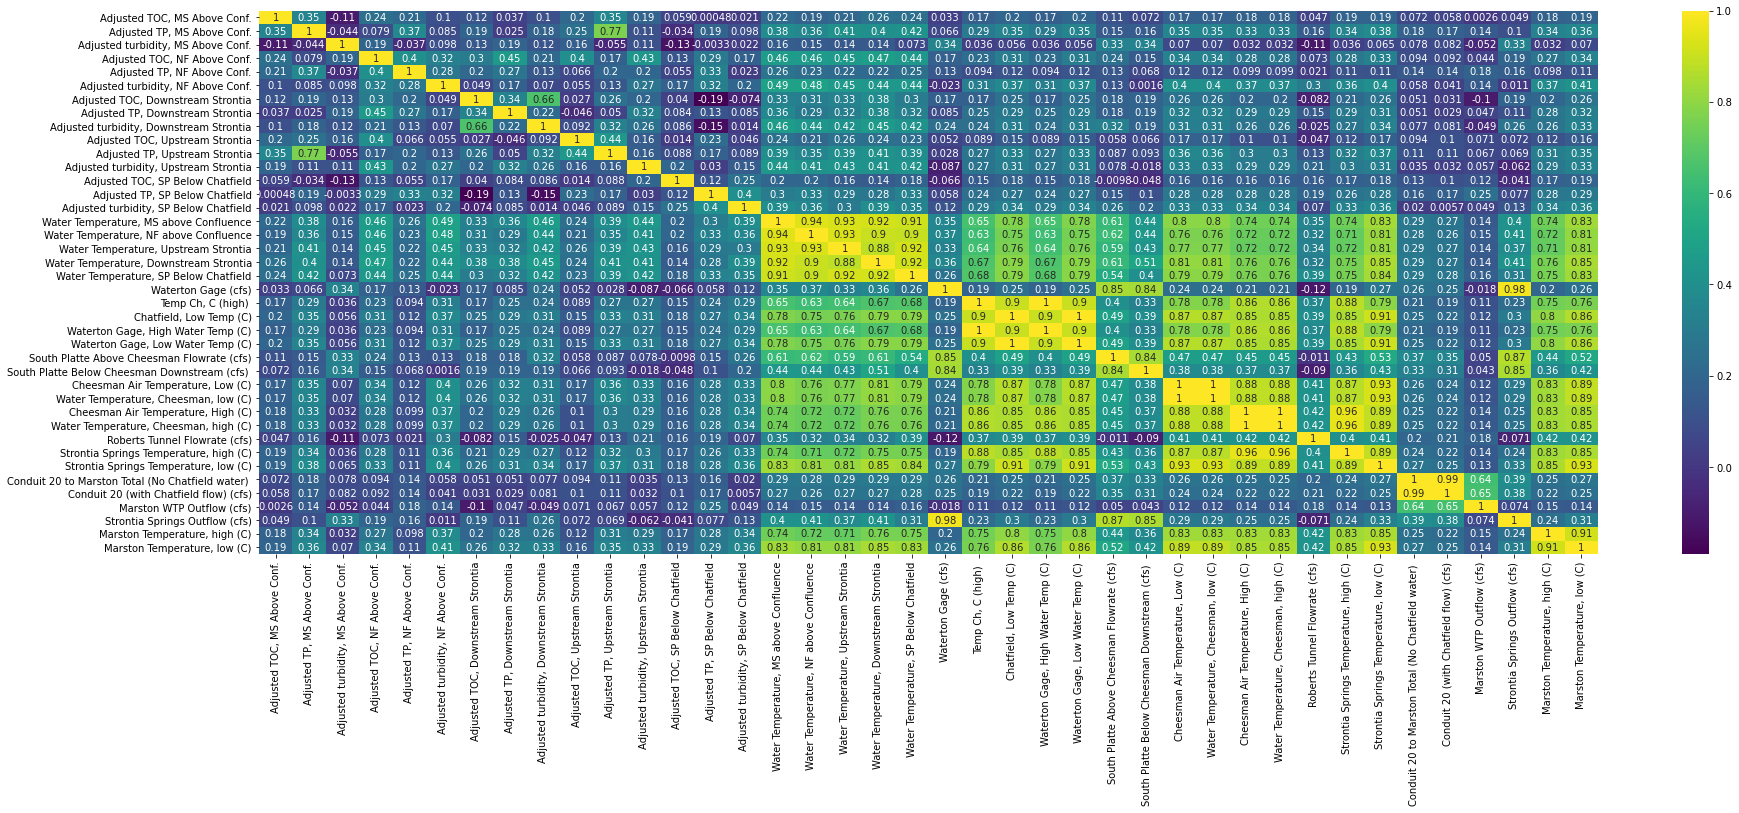

In [35]:
corrl = df_final.corr()

import matplotlib.pyplot as plt

plt.figure(figsize = (30,10))
ax = sb.heatmap(corrl,cmap='viridis',annot = True)

In [36]:
#drop columns from above based on correlation matrix 
df_final = df_final.drop(columns = ['Water Temperature, MS above Confluence','Water Temperature, NF above Confluence','Water Temperature, Upstream Strontia','Water Temperature, Downstream Strontia','Water Temperature, SP Below Chatfield','Temp Ch, C (high) ','Chatfield, Low Temp (C)','Waterton Gage, High Water Temp (C)','Waterton Gage, Low Water Temp (C)','Cheesman Air Temperature, Low (C)','Water Temperature, Cheesman, low (C)','Cheesman Air Temperature, High (C)','Water Temperature, Cheesman, high (C)','Strontia Springs Temperature, high (C)','Strontia Springs Temperature, low (C)'])

<AxesSubplot:>

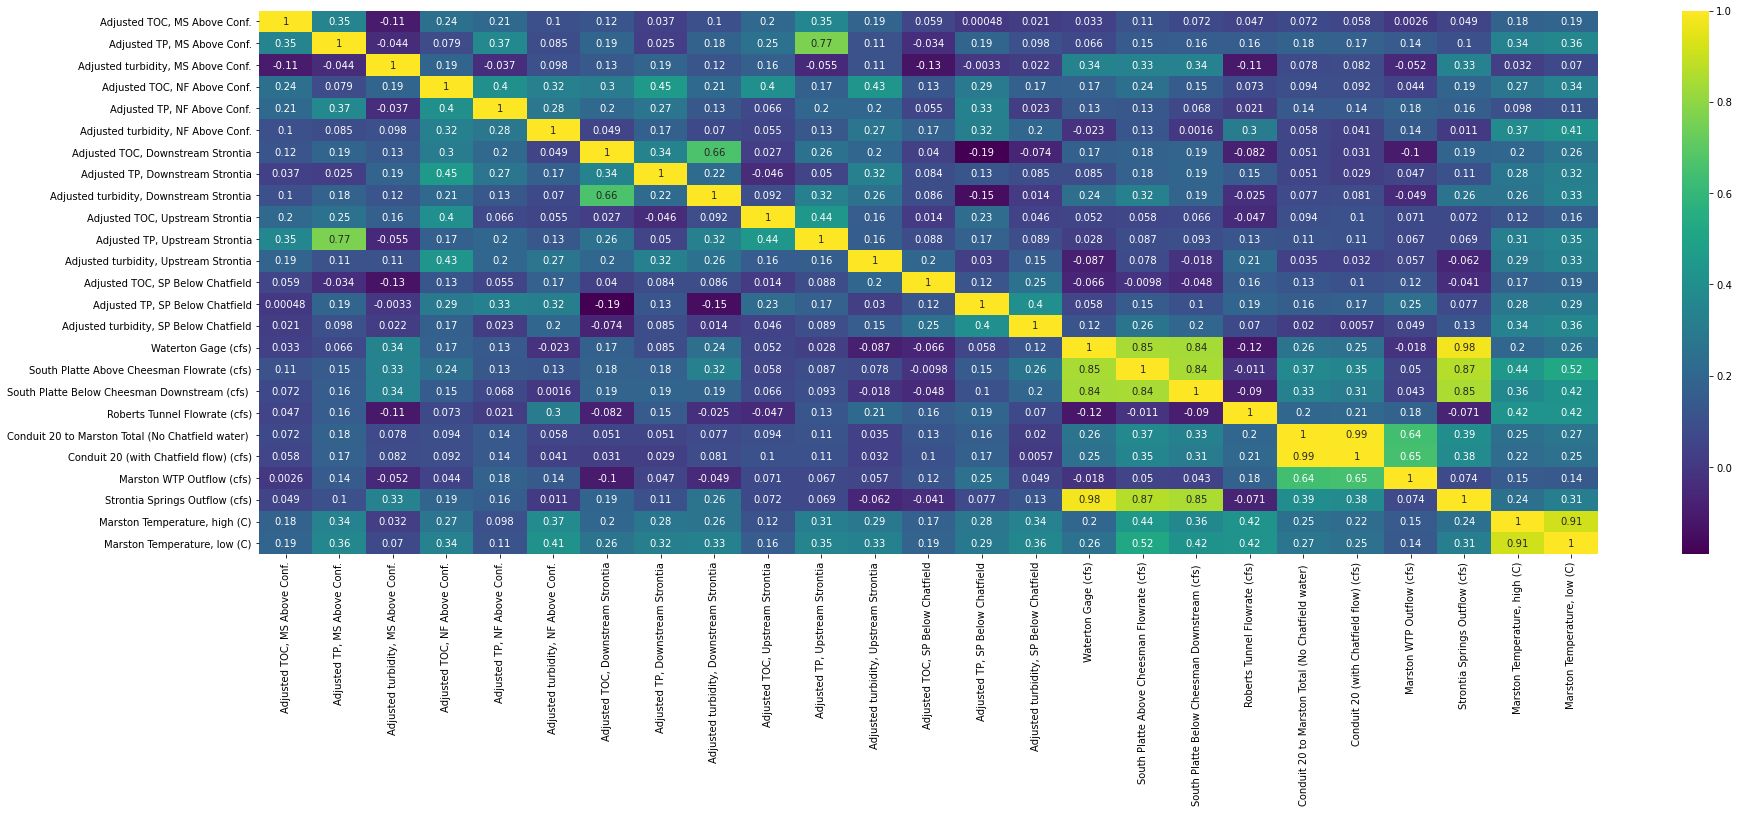

In [37]:
#new correlation matrix
corrl = df_final.corr()

plt.figure(figsize = (30,10))
sb.heatmap(corrl,cmap='viridis',annot = True)

In [38]:
#create the linear regression
df_final_copy = df_final

In [39]:
#merge with df_geosmin_updated to only get values from dates
result = pd.merge(df_final_copy, df_geosmin_updated, on= "Date")

#cleaning of result
result = result.drop(columns = ['SAMPLE_NUMBER','SAMPLING_POINT_DESCRIPTION','SITE','ANALYTE','Time','FACILITY','SAMPLED_DATE'])

In [40]:
result = result.set_index(['Date'])

In [41]:
result = result.drop(columns = ['SAMPLE_NAME','UNITS','DEPTH','Target'])

In [42]:
result

,"Adjusted TOC, MS Above Conf.","Adjusted TP, MS Above Conf.","Adjusted turbidity, MS Above Conf.","Adjusted TOC, NF Above Conf.","Adjusted TP, NF Above Conf.","Adjusted turbidity, NF Above Conf.","Adjusted TOC, Downstream Strontia","Adjusted TP, Downstream Strontia","Adjusted turbidity, Downstream Strontia","Adjusted TOC, Upstream Strontia",...,South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),Roberts Tunnel Flowrate (cfs),Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)","Marston Temperature, low (C)",FORMATTED_ENTRY
Date,,,,,,,,,,,,,,,,,,,,,
7/2/2012,2.220000,0.037846,1.914504,3.789097,0.030633,0.201790,3.054700,0.017974,1.979235,4.592145,...,92.0,300.0,355.30000,145.79,164.79,123.76,189.04,35.555556,18.333333,26.69
7/10/2012,2.350000,0.029820,1.405017,3.568165,0.029647,0.622845,2.625801,0.017401,1.850051,4.356221,...,229.0,166.0,88.70625,155.23,174.23,61.88,204.54,25.555556,15.000000,4.64
7/18/2012,2.470000,0.023496,1.031115,3.115756,0.027722,1.756602,2.086761,0.016213,1.786213,3.819891,...,229.0,332.0,304.00000,103.66,122.66,90.24,157.67,30.555556,15.000000,24.63
7/25/2012,2.590000,0.019073,0.786555,2.713231,0.025947,3.027714,1.762570,0.015928,1.774773,3.318824,...,249.0,275.0,304.00000,129.67,148.67,123.76,232.79,33.333333,17.777778,62.66
7/25/2012,2.590000,0.019073,0.786555,2.713231,0.025947,3.027714,1.762570,0.015928,1.774773,3.318824,...,249.0,275.0,304.00000,129.67,148.67,123.76,232.79,33.333333,17.777778,5.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/7/2022,3.477064,0.018641,1.754127,2.441488,0.017470,4.770415,3.611522,0.013014,3.497562,2.651578,...,192.0,65.6,144.18750,56.33,56.33,46.93,177.00,25.000000,11.666667,4.00
6/7/2022,3.477064,0.018641,1.754127,2.441488,0.017470,4.770415,3.611522,0.013014,3.497562,2.651578,...,192.0,65.6,144.18750,56.33,56.33,46.93,177.00,25.000000,11.666667,3.00
6/14/2022,3.393864,0.020067,2.380909,2.617595,0.016871,5.173505,3.205720,0.014305,3.034788,2.775212,...,162.0,62.5,170.33330,90.47,90.47,59.84,222.00,35.000000,12.777778,3.00


In [43]:
x_names = result.columns.values.tolist()

In [44]:
x_names

['Adjusted TOC, MS Above Conf.',
 'Adjusted TP, MS Above Conf.',
 'Adjusted turbidity, MS Above Conf.',
 'Adjusted TOC, NF Above Conf.',
 'Adjusted TP, NF Above Conf.',
 'Adjusted turbidity, NF Above Conf.',
 'Adjusted TOC, Downstream Strontia',
 'Adjusted TP, Downstream Strontia',
 'Adjusted turbidity, Downstream Strontia',
 'Adjusted TOC, Upstream Strontia',
 'Adjusted TP, Upstream Strontia',
 'Adjusted turbidity, Upstream Strontia',
 'Adjusted TOC, SP Below Chatfield',
 'Adjusted TP, SP Below Chatfield',
 'Adjusted turbidity, SP Below Chatfield',
 'Waterton Gage (cfs)',
 'South Platte Above Cheesman Flowrate (cfs)',
 'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Strontia Springs Outflow (cfs)',
 'Marston Temperature, high (C)',
 'Marston Temperature, low (C)',
 'FORMATTED_ENTRY']

## Checking the target variable - geosmin concentrations

/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


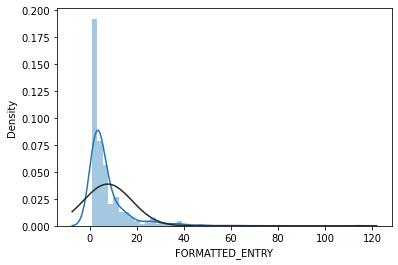

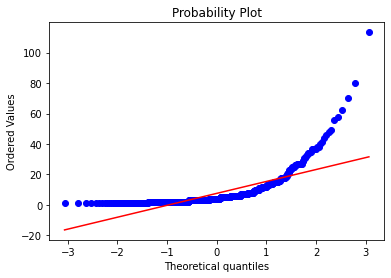

In [45]:
from scipy.stats import norm
from scipy import stats
import seaborn as sns

sns.distplot(result['FORMATTED_ENTRY'], fit=norm);
fig = plt.figure()
res = stats.probplot(result['FORMATTED_ENTRY'], plot=plt)

## AIC and multivariate linear regression development

In [46]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

x = result[[#'Adjusted TOC, MS Above Conf.',
 'Adjusted TP, MS Above Conf.',
 'Adjusted turbidity, MS Above Conf.',
 #'Adjusted TOC, NF Above Conf.',
 #'Adjusted TP, NF Above Conf.',
 #'Adjusted turbidity, NF Above Conf.',
 'Adjusted TOC, Downstream Strontia',
 'Adjusted TP, Downstream Strontia',
 'Adjusted turbidity, Downstream Strontia',
 'Adjusted TOC, Upstream Strontia',
 'Adjusted TP, Upstream Strontia',
 'Adjusted turbidity, Upstream Strontia',
 'Adjusted TOC, SP Below Chatfield',
 'Adjusted TP, SP Below Chatfield',
 #'Adjusted turbidity, SP Below Chatfield',
 'Waterton Gage (cfs)',
 'South Platte Above Cheesman Flowrate (cfs)',
 #'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 #'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Marston Temperature, high (C)',
 'Strontia Springs Outflow (cfs)',
 #'Marston Temperature, low (C)',
 #'FORMATTED_ENTRY'
 ]]

x = StandardScaler().fit_transform(x)

y = result[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [7.60381476]
Coefficients: 
 [[ 0.27801838  0.9748598  -0.85436552  0.0703058   0.22887216 -0.25276119
  -0.61046364 -3.02686009  2.08386256  0.74272307 -0.51208759 -1.15490643
   1.36894048  2.15409824 -2.26221752  1.34400557 -0.84191121]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     7.781
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           8.68e-18
Time:                        10:36:45   Log-Likelihood:                -2327.2
No. Observations:                 637   AIC:                             4690.
Df Residuals:                     619   BIC:                             4771.
Df Model:                          17                                         
Covariance Type:            nonrobu

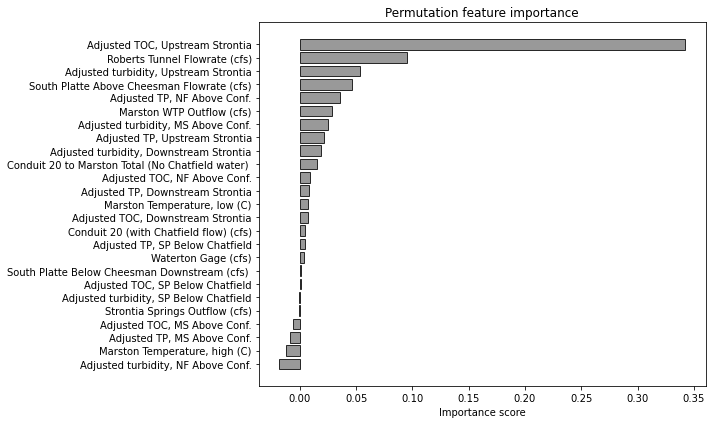

In [47]:
#testing and training data
import rfpimp
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

features_imp = ['Adjusted TOC, MS Above Conf.',
 'Adjusted TP, MS Above Conf.',
 'Adjusted turbidity, MS Above Conf.',
 'Adjusted TOC, NF Above Conf.',
 'Adjusted TP, NF Above Conf.',
 'Adjusted turbidity, NF Above Conf.',
 'Adjusted TOC, Downstream Strontia',
 'Adjusted TP, Downstream Strontia',
 'Adjusted turbidity, Downstream Strontia',
 'Adjusted TOC, Upstream Strontia',
 'Adjusted TP, Upstream Strontia',
 'Adjusted turbidity, Upstream Strontia',
 'Adjusted TOC, SP Below Chatfield',
 'Adjusted TP, SP Below Chatfield',
 'Adjusted turbidity, SP Below Chatfield',
 'Waterton Gage (cfs)',
 'South Platte Above Cheesman Flowrate (cfs)',
 'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Strontia Springs Outflow (cfs)',
 'Marston Temperature, high (C)',
 'Marston Temperature, low (C)',
 'FORMATTED_ENTRY'
 ]

result_train, result_test = train_test_split(result, test_size=0.20)
result_train = result_train[features_imp]
result_test = result_test[features_imp]

X_train, y_train = result_train.drop('FORMATTED_ENTRY',axis=1), result_train['FORMATTED_ENTRY']
X_test, y_test = result_test.drop('FORMATTED_ENTRY',axis=1), result_test['FORMATTED_ENTRY']

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

#permutation feature importance
imp = rfpimp.importances(rf, X_test, y_test)

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
#ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
#        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()

/var/folders/fv/w_4_6lgj0pg873rfkcnj0z7c0000gn/T/ipykernel_11056/2742217772.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


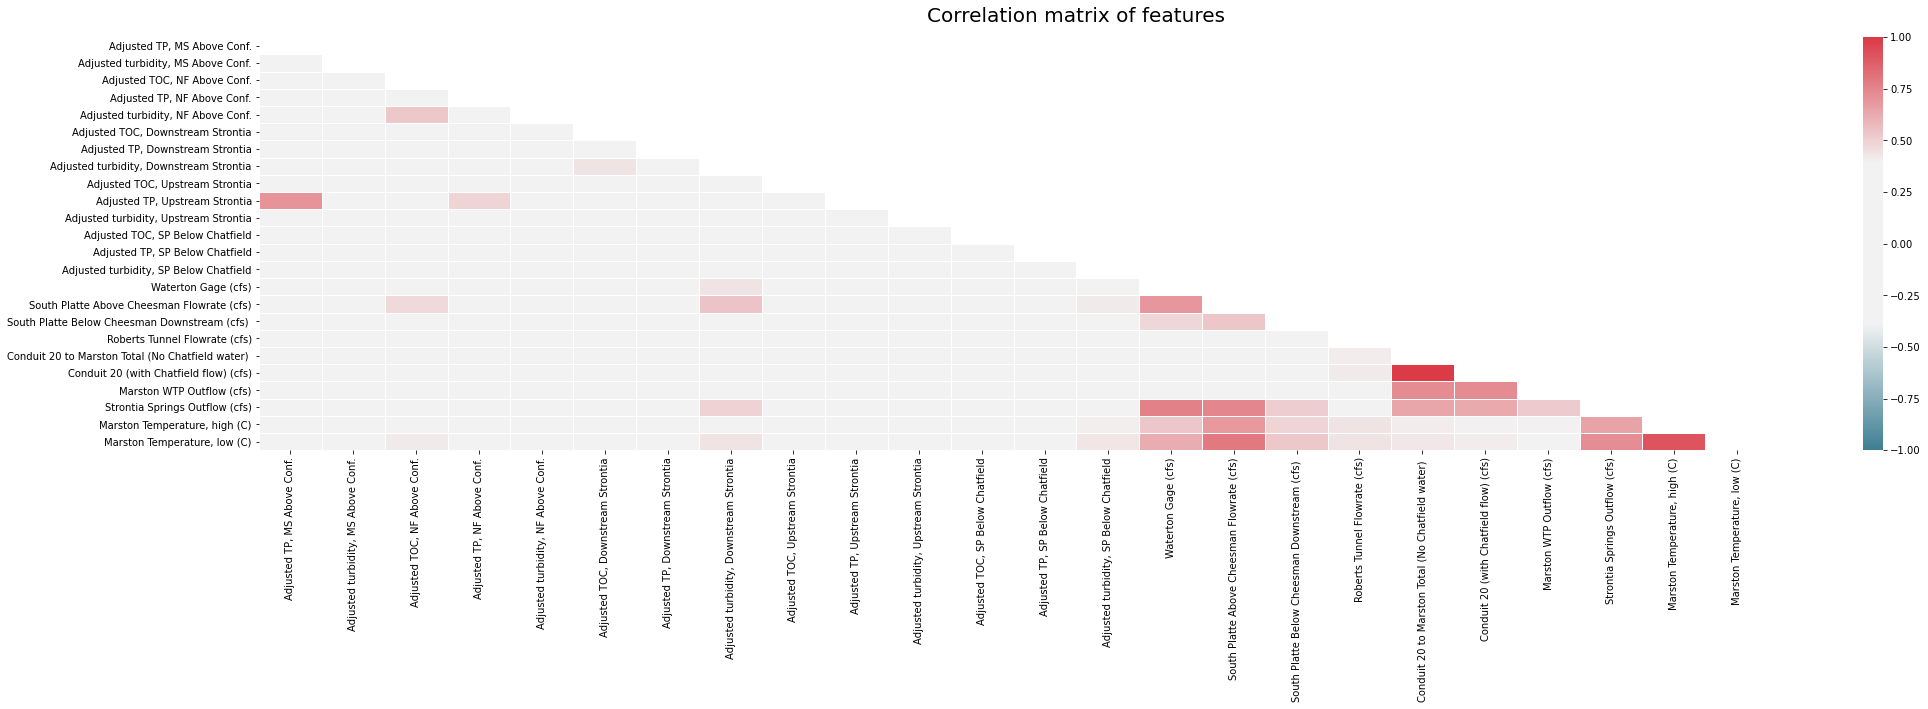

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns

result = result.iloc[:, 1:-1]

corr = result.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(30, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=20)
#ax.text(0.77, 0.2, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()

Feature 0: 0.403171
Feature 1: 0.239912
Feature 2: 5.774787
Feature 3: 0.906518
Feature 4: 0.694146
Feature 5: 2.842653
Feature 6: 8.787950
Feature 7: 0.200360
Feature 8: 9.447839
Feature 9: 0.948884
Feature 10: 0.029532
Feature 11: 26.200424
Feature 12: 18.450736
Feature 13: 5.098994
Feature 14: 0.907985
Feature 15: 6.544751
Feature 16: 6.891716
Feature 17: 3.658106
Feature 18: 29.153071
Feature 19: 1.825729
Feature 20: 1.636227
Feature 21: 0.011411
Feature 22: 5.961505
Feature 23: 5.248570
Feature 24: 2.387047


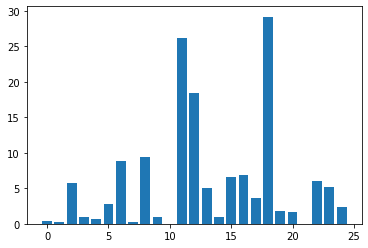

In [53]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [50]:
# evaluation of a model using 10 features chosen with correlation
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=8)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 6.344


In [54]:
Linreg = LinearRegression()
Linreg.fit(X_train, y_train)
Linreg.score(X_test,y_test)

-0.03563985782635548

In [51]:
#AIC development
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

#comparison - calculating both AIC and AICc
def aic(n,mse, num_params):
    aic = n * np.log(mse) + (2 * num_params)
    aic_c = aic + (2 * num_params * (num_params + 1))/ (n - num_params - 1)
    return (aic, aic_c)


#comparison of the aic and aic_c values - using to prevent overfitting of the model

#defined from above, we have (x) and (y)
#x = x_names
#y = geosmin concentrations (FORMATTED_ENTRY)
pcr1 = make_pipeline(PCA(n_components = 5), LinearRegression())
pcr2 = make_pipeline(PCA(n_components = 10), LinearRegression())

#Cross-validation
y_cv1 = cross_val_predict(pcr1, x, y, cv=10)
y_cv2 = cross_val_predict(pcr2, x, y, cv=10)
 
# Calculate MSE
mse1 = mean_squared_error(y, y_cv1)
mse2 = mean_squared_error(y, y_cv2)
 
# Compute AIC
aic1, aicc1 = aic(x.shape[0], mse1, pcr1.steps[0][1].n_components+1)
aic2, aicc2 = aic(x.shape[0], mse2, pcr2.steps[0][1].n_components+1)
 
# Print data
print("AIC, model 1:", aic1)
print("AICc, model 1:", aicc1)
print("AIC, model 2:", aic2)
print("AICc, model 2:", aicc2)


AIC, model 1: 2979.820628473076
AICc, model 1: 2979.953961806409
AIC, model 2: 3047.9852796107693
AICc, model 2: 3048.4076796107693


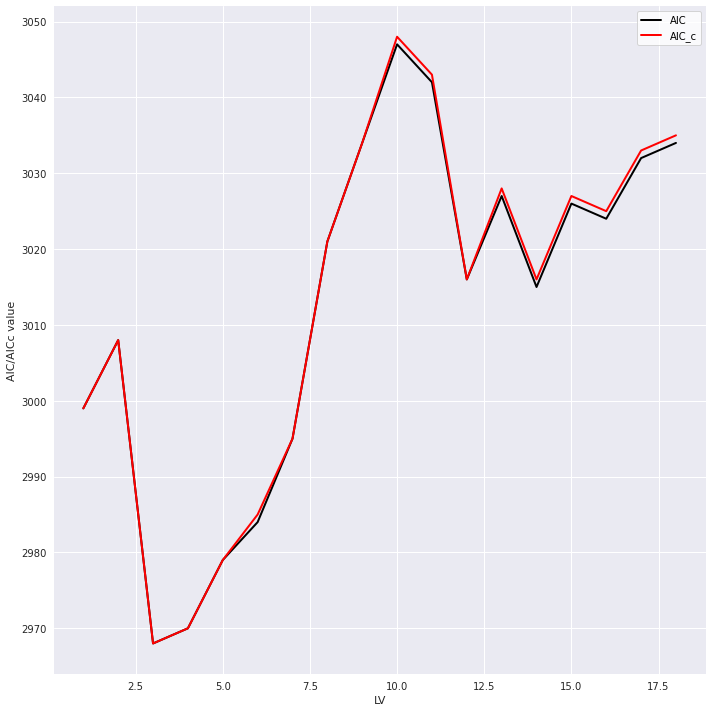

In [52]:
#based on graph below, it seems like optimal LV (variable) value for fitting the model to Geosmin ratings would be 8

import matplotlib.pyplot as plt
import pandas as pd

ncomponents = np.arange(1,19,1)
AIC = np.zeros_like(ncomponents)
AIC_c = np.zeros_like(ncomponents)
for i, nc in enumerate(ncomponents):

    pcr = make_pipeline(PCA(n_components = nc), LinearRegression())
    y_cv = cross_val_predict(pcr, x, y, cv = 10) #common to use cv = 10

    mserror = mean_squared_error(y, y_cv)
    AIC[i], AIC_c[i] = aic(x.shape[0], mserror, pcr.steps[0][1].n_components + 1)

plt.figure(figsize = (10,10))
with plt.style.context(('seaborn')):
    plt.plot(ncomponents, AIC, 'k', lw=2, label="AIC")
    plt.plot(ncomponents,AIC_c, 'r', lw=2, label="AIC_c")

plt.xlabel("LV")
plt.ylabel("AIC/AICc value")
plt.tight_layout()
plt.legend()
plt.show()